In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# Load the dataset
olympic_df = pd.read_csv('../Resources/Machine_Learning_datasetv2.csv')
olympic_df = olympic_df.drop(['Unnamed: 0', 'athlete_count_y'], axis=1)
olympic_df = olympic_df.rename(columns={'GDP per capita': 'gdp_per_capita'})
winter_olympic_df = olympic_df[olympic_df['Season'] == 'Winter']
winter_olympic_df

,NOC,Year,Season,Host,athlete_count_x,Population,gdp_per_capita,Gold,Silver,Bronze,country_medal_total,olympic_total,medal_share,athlete_share
1611,ALB,2006,Winter,0,3,2992547.0,7347.33,0.0,0.0,0.0,0.0,252.0,0.000000,0.000905
1612,ALG,2006,Winter,0,3,33641007.0,10385.78,0.0,0.0,0.0,0.0,252.0,0.000000,0.000905
1613,ARG,2006,Winter,0,17,39289876.0,16490.47,0.0,0.0,0.0,0.0,252.0,0.000000,0.005128
1614,ARM,2006,Winter,0,8,2958301.0,8798.75,0.0,0.0,0.0,0.0,252.0,0.000000,0.002413
1615,AUS,2006,Winter,0,40,20697900.0,42650.99,1.0,0.0,1.0,2.0,252.0,0.007937,0.012066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2498,TUR,2002,Winter,0,5,65145357.0,11753.95,0.0,0.0,0.0,0.0,234.0,0.000000,0.001605
2499,UKR,2002,Winter,0,79,48202470.0,6262.98,0.0,0.0,0.0,0.0,234.0,0.000000,0.025353
2500,USA,2002,Winter,1,232,287625193.0,46266.30,10.0,13.0,11.0,34.0,234.0,0.145299,0.074454
2501,UZB,2002,Winter,0,6,25271850.0,4777.29,0.0,0.0,0.0,0.0,234.0,0.000000,0.001926


In [14]:
# Removing 2016
winter_olympics_test_df = winter_olympic_df[winter_olympic_df['Year'] != 2014]

In [15]:
# Winter olympics machine learning dataframe
winter_olympics_test_df = winter_olympics_test_df.drop(['NOC', 'Year', 'Season', 'athlete_count_x', 'Gold', 'Silver', 'Bronze', 'country_medal_total', 'olympic_total'], axis=1)
winter_olympics_test_df

,Host,Population,gdp_per_capita,medal_share,athlete_share
1611,0,2992547.0,7347.33,0.000000,0.000905
1612,0,33641007.0,10385.78,0.000000,0.000905
1613,0,39289876.0,16490.47,0.000000,0.005128
1614,0,2958301.0,8798.75,0.000000,0.002413
1615,0,20697900.0,42650.99,0.007937,0.012066
...,...,...,...,...,...
2498,0,65145357.0,11753.95,0.000000,0.001605
2499,0,48202470.0,6262.98,0.000000,0.025353
2500,1,287625193.0,46266.30,0.145299,0.074454
2501,0,25271850.0,4777.29,0.000000,0.001926


In [16]:
# independent and dependent variables
X = winter_olympics_test_df[['Population', 'gdp_per_capita', 'Host', 'athlete_share']]
y = winter_olympics_test_df[['medal_share']]

In [17]:
# Create and fit the model
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=89)
model = LinearRegression()
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.5836137303485529
Testing Score: 0.4503892459490414


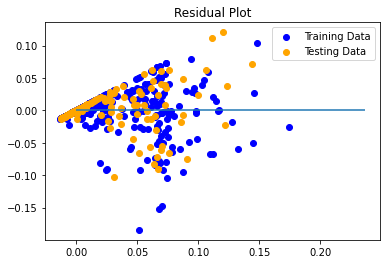

In [18]:
# Plot the residuals for the training and testing data.

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
plt.show()


In [26]:
# 2014 predicted dataset
winter_olympic_predicted_df = winter_olympic_df[winter_olympic_df['Year'] == 2014]
winter_olympic_predicted_df = winter_olympic_predicted_df.drop(['NOC', 'Year', 'Season', 'athlete_count_x', 'Gold', 'Silver', 'Bronze', 'country_medal_total', 'olympic_total', 'medal_share'], axis=1)
winter_olympic_predicted_df = winter_olympic_predicted_df[['Population', 'gdp_per_capita', 'Host', 'athlete_share']]
winter_olympic_predicted_df

,Population,gdp_per_capita,Host,athlete_share
1756,2889104.0,9808.0,0,0.000542
1757,42669500.0,19183.0,0,0.005419
1758,2912403.0,9735.0,0,0.001626
1759,23475686.0,47867.0,0,0.021132
1760,8546356.0,41338.0,0,0.043349
...,...,...,...,...
1827,45272155.0,9818.0,0,0.021403
1828,318386329.0,51664.0,0,0.071525
1829,30757700.0,9085.0,0,0.001355
1830,30042973.0,20317.0,0,0.000271


In [27]:
# Predictions
winter_predictions = model.predict(winter_olympic_predicted_df)
winter_predictions_df = pd.DataFrame(winter_predictions, winter_olympic_predicted_df.index)
winter_predictions_df.columns =['medal_share_predicted']
winter_predictions_df

,medal_share_predicted
1756,-0.008196
1757,0.002659
1758,-0.006921
1759,0.036886
1760,0.060368
...,...
1827,0.017081
1828,0.099871
1829,-0.007604
1830,-0.002976


In [28]:
# Merge dataframes
winter_predicted_df = winter_olympic_predicted_df.merge(winter_predictions_df, left_index=True, right_index=True )
winter_predicted_df

,Population,gdp_per_capita,Host,athlete_share,medal_share_predicted
1756,2889104.0,9808.0,0,0.000542,-0.008196
1757,42669500.0,19183.0,0,0.005419,0.002659
1758,2912403.0,9735.0,0,0.001626,-0.006921
1759,23475686.0,47867.0,0,0.021132,0.036886
1760,8546356.0,41338.0,0,0.043349,0.060368
...,...,...,...,...,...
1827,45272155.0,9818.0,0,0.021403,0.017081
1828,318386329.0,51664.0,0,0.071525,0.099871
1829,30757700.0,9085.0,0,0.001355,-0.007604
1830,30042973.0,20317.0,0,0.000271,-0.002976


In [30]:
# Setting minimum medals at 0
winter_predicted_df['positive_medal_share'] = np.where(winter_predicted_df['medal_share_predicted'] < 0, 0, winter_predicted_df['medal_share_predicted'])
winter_predicted_df

,Population,gdp_per_capita,Host,athlete_share,medal_share_predicted,positive_medal_share
1756,2889104.0,9808.0,0,0.000542,-0.008196,0.000000
1757,42669500.0,19183.0,0,0.005419,0.002659,0.002659
1758,2912403.0,9735.0,0,0.001626,-0.006921,0.000000
1759,23475686.0,47867.0,0,0.021132,0.036886,0.036886
1760,8546356.0,41338.0,0,0.043349,0.060368,0.060368
...,...,...,...,...,...,...
1827,45272155.0,9818.0,0,0.021403,0.017081,0.017081
1828,318386329.0,51664.0,0,0.071525,0.099871,0.099871
1829,30757700.0,9085.0,0,0.001355,-0.007604,0.000000
1830,30042973.0,20317.0,0,0.000271,-0.002976,0.000000


In [32]:
# Determine predicted medal counts with 294 total medals from 2014 winter olympics
winter_predicted_df['predicted_medals'] = winter_predicted_df['positive_medal_share'] * 294
winter_predicted_df

,Population,gdp_per_capita,Host,athlete_share,medal_share_predicted,positive_medal_share,predicted_medals
1756,2889104.0,9808.0,0,0.000542,-0.008196,0.000000,0.000000
1757,42669500.0,19183.0,0,0.005419,0.002659,0.002659,0.781800
1758,2912403.0,9735.0,0,0.001626,-0.006921,0.000000,0.000000
1759,23475686.0,47867.0,0,0.021132,0.036886,0.036886,10.844453
1760,8546356.0,41338.0,0,0.043349,0.060368,0.060368,17.748107
...,...,...,...,...,...,...,...
1827,45272155.0,9818.0,0,0.021403,0.017081,0.017081,5.021841
1828,318386329.0,51664.0,0,0.071525,0.099871,0.099871,29.362138
1829,30757700.0,9085.0,0,0.001355,-0.007604,0.000000,0.000000
1830,30042973.0,20317.0,0,0.000271,-0.002976,0.000000,0.000000


In [34]:
# Add in NOCs
predicted_NOC_df = winter_olympic_df[winter_olympic_df['Year'] == 2014]
predicted_NOC_df = predicted_NOC_df[['NOC']]
predicted_NOC_df

,NOC
1756,ALB
1757,ARG
1758,ARM
1759,AUS
1760,AUT
...,...
1827,UKR
1828,USA
1829,UZB
1830,VEN


In [35]:
# Merge final dataset
winter_predicted_df = winter_predicted_df.merge(predicted_NOC_df, left_index=True, right_index=True )
winter_predicted_df

,Population,gdp_per_capita,Host,athlete_share,medal_share_predicted,positive_medal_share,predicted_medals,NOC
1756,2889104.0,9808.0,0,0.000542,-0.008196,0.000000,0.000000,ALB
1757,42669500.0,19183.0,0,0.005419,0.002659,0.002659,0.781800,ARG
1758,2912403.0,9735.0,0,0.001626,-0.006921,0.000000,0.000000,ARM
1759,23475686.0,47867.0,0,0.021132,0.036886,0.036886,10.844453,AUS
1760,8546356.0,41338.0,0,0.043349,0.060368,0.060368,17.748107,AUT
...,...,...,...,...,...,...,...,...
1827,45272155.0,9818.0,0,0.021403,0.017081,0.017081,5.021841,UKR
1828,318386329.0,51664.0,0,0.071525,0.099871,0.099871,29.362138,USA
1829,30757700.0,9085.0,0,0.001355,-0.007604,0.000000,0.000000,UZB
1830,30042973.0,20317.0,0,0.000271,-0.002976,0.000000,0.000000,VEN


In [36]:
winter_predicted_df.to_csv('../Resources/Winter_predictions.csv')